In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline
import os
#print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv("heart.csv") # read csv file
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Shape of dataset
dataset.shape

(303, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


In [6]:
#Description
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Information about the columns of the dataset:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [9]:
#Analysing the 'target' variable
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [11]:
#Checking correlation between columns
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


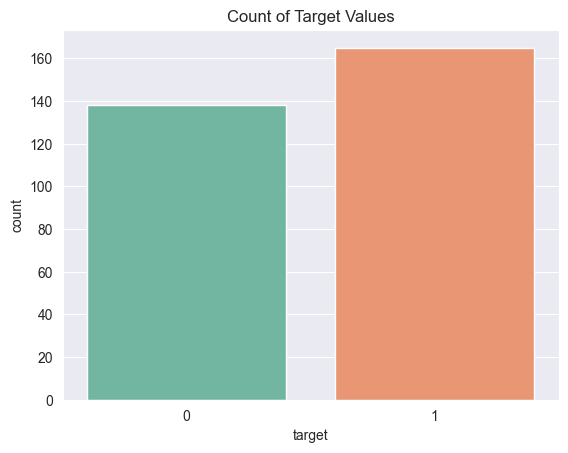

target
1    165
0    138
Name: count, dtype: int64


In [12]:
#Exploratory Data Analysis (EDA)
### First, analysing the target variable:

# Set the style
sns.set_style('darkgrid')

# Choose a color palette (optional: you can change 'Set2' to other palettes like 'husl', 'coolwarm', etc.)
palette = 'Set2'

# Create the countplot for the target variable
sns.countplot(x='target', data=dataset, palette=palette)

# Display the plot
plt.title('Count of Target Values')
plt.show()

# Display the count of target values
target_temp = dataset['target'].value_counts()
print(target_temp)

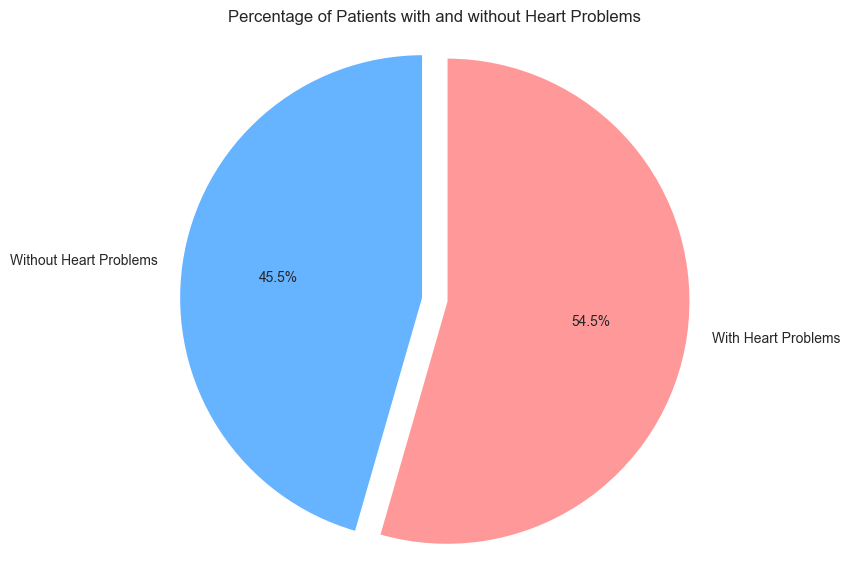

In [13]:
# Define labels and sizes for the pie chart
labels = ['Without Heart Problems', 'With Heart Problems']
sizes = [target_temp[0], target_temp[1]]

# Set colors
colors = ['#66b3ff', '#ff9999']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.title('Percentage of Patients with and without Heart Problems')
plt.show()


In [14]:
### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features
dataset["sex"].unique()

array([1, 0], dtype=int64)

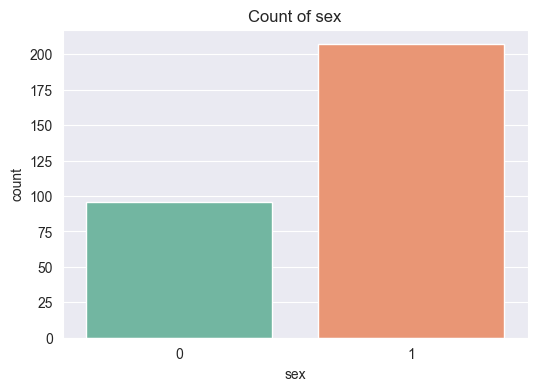

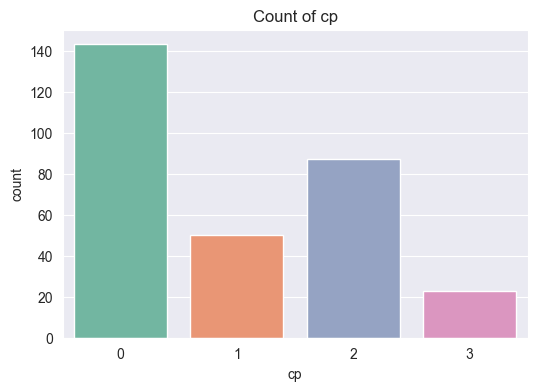

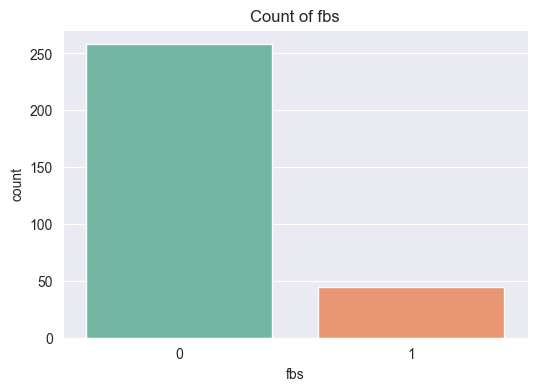

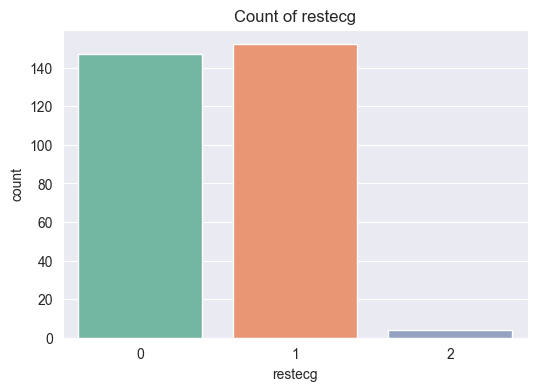

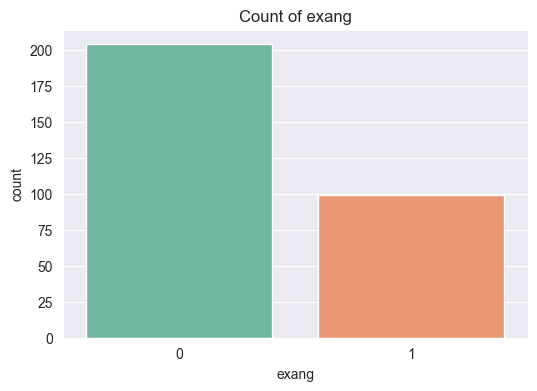

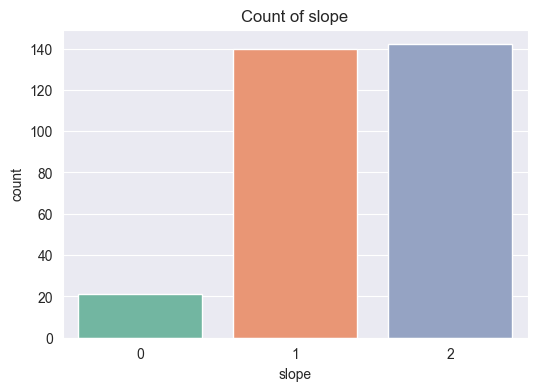

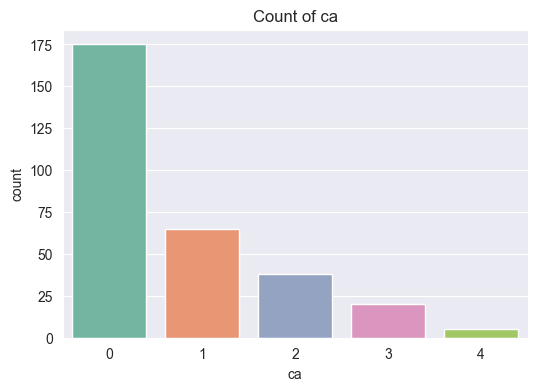

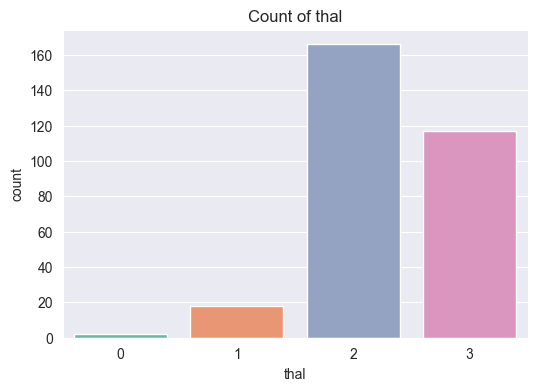

In [15]:
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Set the style
sns.set_style('darkgrid')

# Choose a color palette (optional: you can change 'Set2' to other palettes like 'husl', 'coolwarm', etc.)
palette = 'Set2'

# Create subplots for each categorical column
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=dataset, palette=palette)
    plt.title(f'Count of {col}')
    plt.show()

In [16]:
numerical_columns = ['age','cp' ,'trestbps', 'chol', 'thalach', 'oldpeak']
data_numeric = dataset[numerical_columns]
z_scores = (data_numeric - data_numeric.mean()) / data_numeric.std()
data_cleaned = dataset[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]
dataset = data_cleaned
print(dataset)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [17]:
#Train Test split
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [18]:
X_train.shape

(235, 13)

In [19]:
X_test.shape

(59, 13)

In [20]:
Y_train.shape

(235,)

In [21]:
Y_test.shape

(59,)

In [23]:
# Model Fitting

#-Logistic Regression

Logistic_Regression = LogisticRegression()

Logistic_Regression.fit(X_train,Y_train)
Y_pred_Logistic_Regression = Logistic_Regression.predict(X_test)

print(Y_pred_Logistic_Regression.shape)

score_Logistic_Regression = round(accuracy_score(Y_pred_Logistic_Regression,Y_test)*100,2)

print("The Accuracy Score achieved using Logistic Regression is: "+str(score_Logistic_Regression)+" %")

(59,)
The Accuracy Score achieved using Logistic Regression is: 83.05 %


In [24]:
#-Naive_Bayes

Naive_Bayes = GaussianNB()

Naive_Bayes.fit(X_train,Y_train)
Y_pred_Naive_Bayes = Naive_Bayes.predict(X_test)

print(Y_pred_Naive_Bayes.shape)

score_Naive_Bayes = round(accuracy_score(Y_pred_Naive_Bayes,Y_test)*100,2)

print("The Accuracy Score achieved using Naive Bayes is: "+str(score_Naive_Bayes)+" %")

(59,)
The Accuracy Score achieved using Naive Bayes is: 81.36 %


In [25]:
#-SVM

SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, Y_train)
Y_pred_svm = SVM.predict(X_test)

print(Y_pred_svm.shape)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The Accuracy Score achieved using Linear SVM is: "+str(score_svm)+" %")

(59,)
The Accuracy Score achieved using Linear SVM is: 79.66 %


In [26]:
#-K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

print(Y_pred_knn.shape)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The Accuracy Score achieved using KNN is: "+str(score_knn)+" %")

(59,)
The Accuracy Score achieved using KNN is: 59.32 %


In [27]:
#-Decision_Tree

max_accuracy = 0

for x in range(200):
    Decision_Tree = DecisionTreeClassifier(random_state=x)
    Decision_Tree.fit(X_train,Y_train)
    Y_pred_Decision_Tree = Decision_Tree.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_Decision_Tree,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

Decision_Tree = DecisionTreeClassifier(random_state=best_x)
Decision_Tree.fit(X_train,Y_train)
Y_pred_Decision_Tree = Decision_Tree.predict(X_test)

print(Y_pred_Decision_Tree.shape)

score_Decision_Tree = round(accuracy_score(Y_pred_Decision_Tree,Y_test)*100,2)

print("The Accuracy Score achieved using Decision Tree is: "+str(score_Decision_Tree)+" %")

(59,)
The Accuracy Score achieved using Decision Tree is: 83.05 %


In [28]:
#-Random_Forest

max_accuracy = 0

for x in range(2000):
    Random_Forest = RandomForestClassifier(random_state=x)
    Random_Forest.fit(X_train,Y_train)
    Y_pred_Random_Forest = Random_Forest.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_Random_Forest,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

Random_Forest = RandomForestClassifier(random_state=best_x)
Random_Forest.fit(X_train,Y_train)
Y_pred_Random_Forest = Random_Forest.predict(X_test)

print(Y_pred_Random_Forest.shape)

score_Random_Forest = round(accuracy_score(Y_pred_Random_Forest,Y_test)*100,2)

print("The Accuracy Score achieved using Random Forest is: "+str(score_Random_Forest)+" %")

(59,)
The Accuracy Score achieved using Random Forest is: 86.44 %


In [29]:
### XGBoost

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

print(Y_pred_xgb.shape)

score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

(59,)
The accuracy score achieved using XGBoost is: 81.36 %


In [30]:
#-Neural Network

model = Sequential()

model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 2s 6ms/step - loss: 105.8319 - accuracy: 0.5702
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 100.2260 - accuracy: 0.5702
Epoch 3/300
8/8 [==============================] - 0s 10ms/step - loss: 94.8015 - accuracy: 0.5702
Epoch 4/300
8/8 [==============================] - 0s 6ms/step - loss: 89.7056 - accuracy: 0.5702
Epoch 5/300
8/8 [==============================] - 0s 16ms/step - loss: 84.7796 - accuracy: 0.5702
Epoch 6/300
8/8 [==============================] - 0s 11ms/step - loss: 79.8205 - accuracy: 0.5702
Epoch 7/300
8/8 [==============================] - 0s 6ms/step - loss: 75.6473 - accuracy: 0.5702
Epoch 8/300
8/8 [==============================] - 0s 7ms/step - loss: 71.2738 - accuracy: 0.5702
Epoch 9/300
8/8 [==============================] - 0s 10ms/step - loss: 67.2894 - accuracy: 0.5702
Epoch 10/300
8/8 [==============================] - 0s 13ms/step - loss: 63.5514 - accuracy: 0.5702
Epoch 11/300

In [31]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8383
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8383
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8383
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8340
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8511
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8426
Epoch 7/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.8596
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8511
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8511
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8383
Epoch 11/300
8/8 [===========

In [32]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [33]:
Y_pred_nn.shape

(59, 1)

In [34]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [35]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The Accuracy Score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The Accuracy Score achieved using Neural Network is: 86.44 %


In [36]:
## Output final score
scores = [score_Logistic_Regression,score_Naive_Bayes,score_svm,score_knn,score_Decision_Tree,score_Random_Forest,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The Accuracy Score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The Accuracy Score achieved using Logistic Regression is: 83.05 %
The Accuracy Score achieved using Naive Bayes is: 81.36 %
The Accuracy Score achieved using Support Vector Machine is: 79.66 %
The Accuracy Score achieved using K-Nearest Neighbors is: 59.32 %
The Accuracy Score achieved using Decision Tree is: 83.05 %
The Accuracy Score achieved using Random Forest is: 86.44 %
The Accuracy Score achieved using XGBoost is: 81.36 %
The Accuracy Score achieved using Neural Network is: 86.44 %


In [37]:
cm_lr = confusion_matrix(Y_test, Y_pred_Logistic_Regression)
print("-----------------------------------------")
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

print("-----------------------------------------")

cm_nb = confusion_matrix(Y_test, Y_pred_Naive_Bayes)
print("Confusion Matrix for Naive Bayes:")
print(cm_nb)

print("-----------------------------------------")

cm_svm = confusion_matrix(Y_test, Y_pred_svm)
print("Confusion Matrix for SVM:")
print(cm_svm)
print("-----------------------------------------")


cm_knn = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix for KNN:")
print(cm_knn)
print("-----------------------------------------")

cm_dt = confusion_matrix(Y_test, Y_pred_Decision_Tree)
print("Confusion Matrix for Decision Tree:")
print(cm_dt)
print("-----------------------------------------")


cm_rf = confusion_matrix(Y_test, Y_pred_Random_Forest)
print("Confusion matrix for Random Forest:")
print(cm_rf)
print("-----------------------------------------")


cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)
print("Confusion matrix for XGBoost:")
print(cm_xgb)
print("-----------------------------------------")


cm_nn = confusion_matrix(Y_test, Y_pred_nn)
print("Confusion matrix for Neural Network:")
print(cm_nn)
print("-----------------------------------------")

-----------------------------------------
Confusion Matrix for Logistic Regression:
[[22  8]
 [ 2 27]]
-----------------------------------------
Confusion Matrix for Naive Bayes:
[[23  7]
 [ 4 25]]
-----------------------------------------
Confusion Matrix for SVM:
[[22  8]
 [ 4 25]]
-----------------------------------------
Confusion Matrix for KNN:
[[15 15]
 [ 9 20]]
-----------------------------------------
Confusion Matrix for Decision Tree:
[[24  6]
 [ 4 25]]
-----------------------------------------
Confusion matrix for Random Forest:
[[25  5]
 [ 3 26]]
-----------------------------------------
Confusion matrix for XGBoost:
[[23  7]
 [ 4 25]]
-----------------------------------------
Confusion matrix for Neural Network:
[[24  6]
 [ 2 27]]
-----------------------------------------


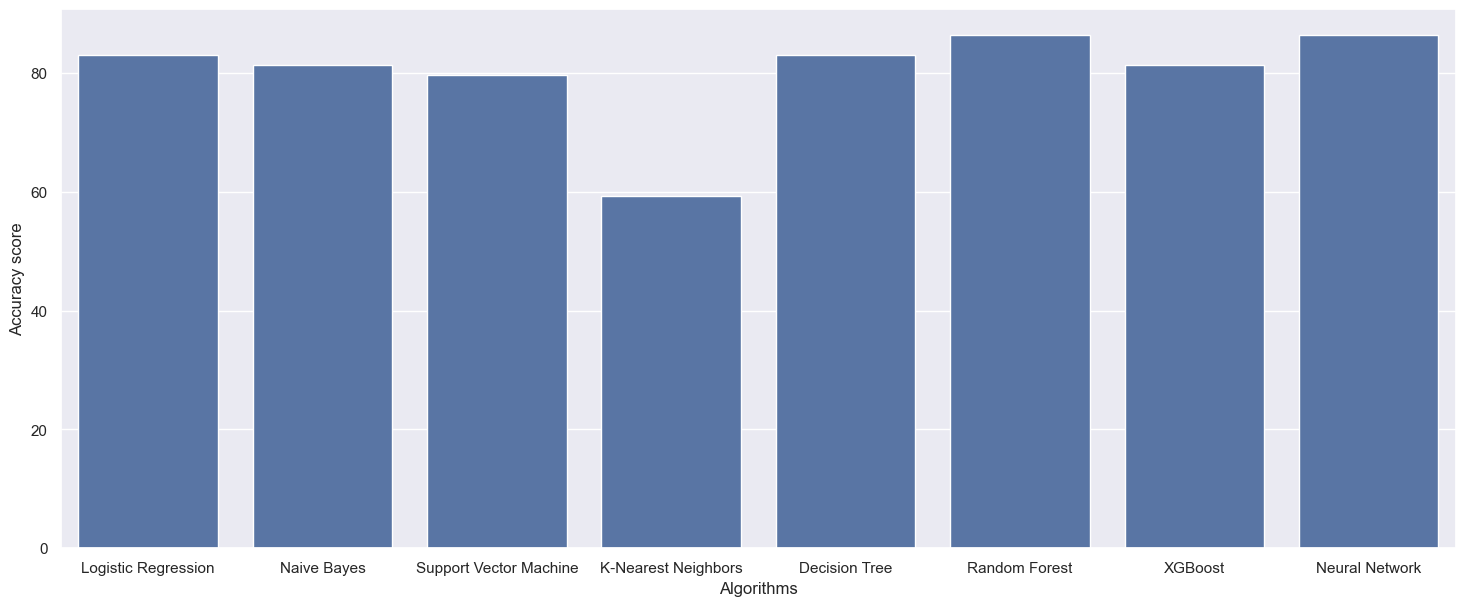

In [38]:
sns.set(rc={'figure.figsize':(18,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Pass algorithms and scores as keyword arguments (x and y)
sns.barplot(x=algorithms, y=scores)

# Show the plot
plt.show()

In [39]:
import pickle

# Save model
pickle.dump(Random_Forest, open('model.pkl', 'wb'))

In [40]:
# user prediction
age_input = input("Enter the patient's age: ")
sex_input = input("Enter the patient's sex: ")
cp_input = input("Enter the patient's cp: ")
trestbps_input = input("Enter the patient's trestbps: ")
chol_input = input("Enter the chol: ")
fbs_input = input("Enter the patient's fbs: ")
restecg_input = input("Enter the patient's restecg: ")
thalach_input = input("Enter the patient's thalach: ")
exang_input = input("Enter the exang: ")
oldpeak_input = input("Enter the patient's oldpeak: ")
slope_input = input("Enter the patient's slope: ")
ca_input = input("Enter the patient's ca: ")
thal_input = input("Enter the thal: ")
new_patient = pd.DataFrame([[age_input,sex_input,cp_input,trestbps_input,chol_input,fbs_input, restecg_input,thalach_input, exang_input, oldpeak_input,slope_input, ca_input,thal_input,]], columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
predicted_drug = Random_Forest.predict(new_patient)[0]
print("You have heart disease:", predicted_drug)